In [1]:
import findspark
findspark.init('spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Alec1').getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/12 05:27:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [78]:
df = spark.read.load('waste11.csv', format='csv',header='true')

In [79]:
for field in df.schema.fields:
    print(field.name +" , "+str(field.dataType))

id , StringType
Waste Type , StringType
Waste disposed , StringType
Total waste recycled , StringType


In [80]:
df.describe().show()

+-------+-----------------+------------+--------------+--------------------+
|summary|               id|  Waste Type|Waste disposed|Total waste recycled|
+-------+-----------------+------------+--------------+--------------------+
|  count|             2521|        2520|          2520|                2508|
|   mean|           1260.5|        null|      681400.0|   18366.50246305419|
| stddev|727.6056624298632|        null|           0.0|   36868.85321930528|
|    min|                "|Ash & Sludge|         1,300|                   0|
|    max|              999| Wood/Timber|        99,100|              99,200|
+-------+-----------------+------------+--------------+--------------------+



In [81]:
df2 = spark.read.load('waste12.csv', format='csv',header='true')

In [82]:
for field in df2.schema.fields:
    print(field.name +" , "+str(field.dataType))

Total waste generated , StringType
Year , StringType
id , StringType


In [68]:
df2.describe().show()

+-------+---------------------+------------------+-----------------+
|summary|Total waste generated|              Year|               id|
+-------+---------------------+------------------+-----------------+
|  count|                 2508|              2520|             2520|
|   mean|             759100.0|2010.6976744186047|           1260.5|
| stddev|    40108.50996270706| 5.381889300723957|727.6056624298632|
|    min|            1,084,700|             2,004|                1|
|    max|               98,300|              2015|              999|
+-------+---------------------+------------------+-----------------+



In [84]:
df_join = df.join(df2, 'id')

In [86]:
df_join.describe().show()

+-------+-----------------+------------+--------------+--------------------+---------------------+------------------+
|summary|               id|  Waste Type|Waste disposed|Total waste recycled|Total waste generated|              Year|
+-------+-----------------+------------+--------------+--------------------+---------------------+------------------+
|  count|             2520|        2520|          2520|                2508|                 2508|              2520|
|   mean|           1260.5|        null|      681400.0|   18366.50246305419|             759100.0|2010.6976744186047|
| stddev|727.6056624298632|        null|           0.0|   36868.85321930528|    40108.50996270706| 5.381889300723957|
|    min|                1|Ash & Sludge|         1,300|                   0|            1,084,700|             2,004|
|    max|              999| Wood/Timber|        99,100|              99,200|               98,300|              2015|
+-------+-----------------+------------+--------------+-

In [2]:
df = spark.read.load('waste111.csv', format='csv',header='true')

In [3]:
df.describe().show()

+-------+---------------------+-----------------+------------+------------------+--------------------+
|summary|Total waste generated|             Year|  Waste Type|    Waste disposed|Total waste recycled|
+-------+---------------------+-----------------+------------+------------------+--------------------+
|  count|                 2509|             2520|        2520|              2520|                2508|
|   mean|   460951.03668261564|           2010.0|        null|198063.80952380953|  263169.77671451354|
| stddev|    424859.3556755318|4.321351294987318|        null| 232769.6413595158|   385784.1671937681|
|    min|                    "|             2003|Ash & Sludge|             10100|                   0|
|    max|                98300|             2017| Wood/Timber|             99100|               99200|
+-------+---------------------+-----------------+------------+------------------+--------------------+



In [4]:
for field in df.schema.fields:
    print(field.name +" , "+str(field.dataType))

Total waste generated , StringType
Year , StringType
Waste Type , StringType
Waste disposed , StringType
Total waste recycled , StringType


In [5]:
for col in df.dtypes:
    print(col[0]+" , "+col[1])

Total waste generated , string
Year , string
Waste Type , string
Waste disposed , string
Total waste recycled , string


In [6]:
df.columns

['Total waste generated',
 'Year',
 'Waste Type',
 'Waste disposed',
 'Total waste recycled']

In [7]:
row = df.count()
col = len(df.columns)
print(f'number of rows: {row}')
print(f'columns: {col}')

number of rows: 2521
columns: 5


In [8]:
# Import the pandas library.
import pandas
# Import matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np
#import seaborn as sns
import seaborn as sns

In [9]:
table=df.toPandas()


In [10]:
table.shape

(2521, 5)

In [11]:
# define method to check and visualise data
from pyspark.sql.functions import col
def check_status(field):
    field_table=table[field]
    field_table=pandas.to_numeric(field_table)
    df2 = df.withColumn(field,
        col(field).cast('double'))
    df2.select(field).describe().show()
    print('skewness: ', field_table.skew())
    plt.hist(field_table)
    return

In [12]:
from pyspark.sql.functions import col
df = df.withColumn('Year',
        col('Year').cast('double'))
df.select('Year').describe().show()

df = df.withColumn('Total waste generated',
        col('Total waste generated').cast('double'))
df.select('Total waste generated').describe().show()

df = df.withColumn('Waste disposed',
        col('Waste disposed').cast('double'))
df.select('Waste disposed').describe().show()

df = df.withColumn('Total waste recycled',
        col('Total waste recycled').cast('double'))
df.select('Total waste recycled').describe().show()

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|             2520|
|   mean|           2010.0|
| stddev|4.321351294987318|
|    min|           2003.0|
|    max|           2017.0|
+-------+-----------------+

+-------+---------------------+
|summary|Total waste generated|
+-------+---------------------+
|  count|                 2508|
|   mean|   460951.03668261564|
| stddev|    424859.3556755318|
|    min|              14400.0|
|    max|            1695300.0|
+-------+---------------------+

+-------+------------------+
|summary|    Waste disposed|
+-------+------------------+
|  count|              2520|
|   mean|198063.80952380953|
| stddev| 232769.6413595158|
|    min|            1300.0|
|    max|          789000.0|
+-------+------------------+

+-------+--------------------+
|summary|Total waste recycled|
+-------+--------------------+
|  count|                2508|
|   mean|  263169.77671451354|
| stddev|   385784.1671937681|
|    min| 

In [13]:
table=df.toPandas()

In [14]:
table.dtypes

Total waste generated    float64
Year                     float64
Waste Type                object
Waste disposed           float64
Total waste recycled     float64
dtype: object

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

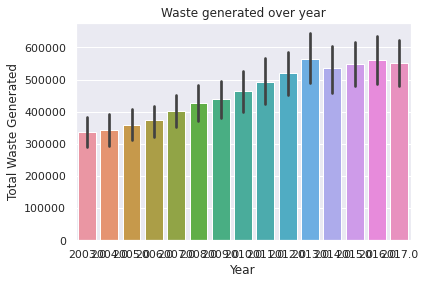

In [15]:
sns.set()
plt.figure()

ax = sns.barplot(data=table, x="Year", y="Total waste generated")

##Display
ax.set_title('Waste generated over year')
ax.set_ylabel('Total Waste Generated')
ax.set_xlabel('Year')
ax.set_xticklabels(table["Year"].unique().astype(str), rotation='vertical')

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

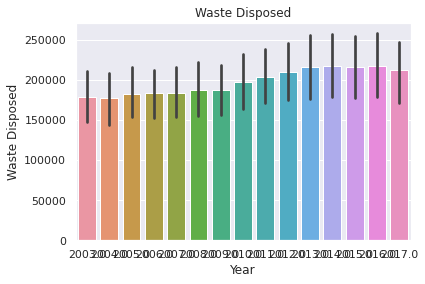

In [16]:
##Total Waste disposed
sns.set()
plt.figure()
ax = sns.barplot(data=table, x="Year", y="Waste disposed")

#Display
ax.set_title('Waste Disposed')
ax.set_ylabel('Waste Disposed')
ax.set_xlabel('Year')
ax.set_xticklabels(table["Year"].unique().astype(str), rotation='vertical')


ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

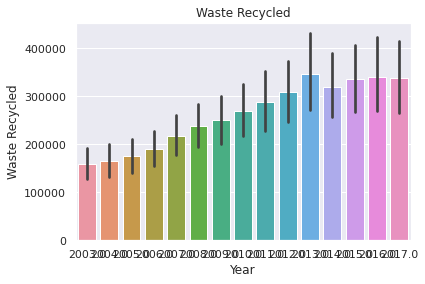

In [61]:
##Total Waste Recycled
sns.set()
plt.figure()
ax = sns.barplot(data=table, x="Year", y="Total waste recycled")

##Display
ax.set_title('Waste Recycled')
ax.set_ylabel('Waste Recycled')
ax.set_xlabel('Year')
ax.set_xticklabels(table["Year"].unique().astype(str), rotation='vertical')

In [17]:
plt.show()

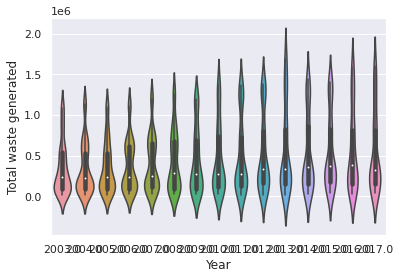

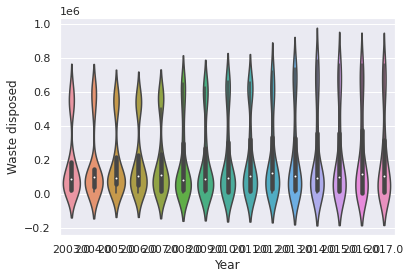

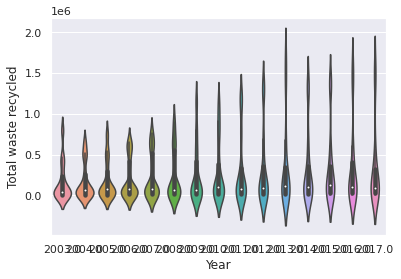

In [18]:
##Violinplot
##The violin plot is one of the data visualisation method which shows the density of the data plot
##Set Plot size for all plots
sns.set()
##Plotting
##Total waste generated
sns.violinplot(x="Year",y="Total waste generated", 
               data=table);
plt.show()

##Waste disposed
sns.violinplot(x="Year",y="Waste disposed", 
               data=table);
plt.show()


##Total waste recycled
sns.violinplot(x="Year",y="Total waste recycled", 
               data=table);
plt.show()

In [19]:
#check missing values
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---------------------+----+----------+--------------+--------------------+
|Total waste generated|Year|Waste Type|Waste disposed|Total waste recycled|
+---------------------+----+----------+--------------+--------------------+
|                   13|   1|         1|             1|                  13|
+---------------------+----+----------+--------------+--------------------+



In [20]:
df=df.na.drop(subset=["Total waste generated","Year","Waste Type","Waste disposed","Total waste recycled"])

In [21]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---------------------+----+----------+--------------+--------------------+
|Total waste generated|Year|Waste Type|Waste disposed|Total waste recycled|
+---------------------+----+----------+--------------+--------------------+
|                    0|   0|         0|             0|                   0|
+---------------------+----+----------+--------------+--------------------+



In [24]:
##Detect Outliers
df0=df.drop('Waste Type')
bounds = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df0.columns
}


In [25]:
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

{'Total waste generated': {'q1': 114400.0, 'q3': 725900.0, 'lower': -802850.0, 'upper': 1643150.0}, 'Year': {'q1': 2006.0, 'q3': 2014.0, 'lower': 1994.0, 'upper': 2026.0}, 'Waste disposed': {'q1': 21100.0, 'q3': 303600.0, 'lower': -402650.0, 'upper': 727350.0}, 'Total waste recycled': {'q1': 16100.0, 'q3': 361200.0, 'lower': -501550.0, 'upper': 878850.0}}


In [26]:
import pyspark.sql.functions as f
df01=df0.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_outliers") 
        for c in df0.columns
    ]
)

In [29]:
df01.groupBy().sum().collect()

[Row(sum(Total waste generated)=1152932000.0, sum(Year)=5018970.0, sum(Waste disposed)=494077600.0, sum(Total waste recycled)=658855600.0, sum(Total waste generated_outliers)=12, sum(Year_outliers)=0, sum(Waste disposed_outliers)=58, sum(Total waste recycled_outliers)=216)]

In [32]:
## Handling Outliers
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col



def get_stats(field):
    df_new = df.select(
        _mean(col(field)).alias('mean'),
        _stddev(col(field)).alias('std')
    ).collect()

    mean = df_new[0]['mean']
    std = df_new[0]['std']
    print(mean,std)
    return mean, std

In [33]:
get_stats('Total waste generated')

461726.87224669603 425274.00085596


(461726.87224669603, 425274.00085596)

In [34]:
from pyspark.sql import functions as F, Window
def replace_outliers(field):
    mean, std=get_stats(field)
    upper = mean + 2*std 
    lower = mean - 2*std

    df2 = df.withColumn(
        field, 
        F.when(
            (df[field] > upper) | (df[field] < lower), 
            F.round(F.mean(field).over(Window.orderBy(F.lit(1)))).cast('double')
            # or you can use 
            # F.round(F.lit(df_fill_miss.select(F.mean(F.col('a')).alias('mean')).collect()[0]['mean'])).cast('double')
        ).otherwise(F.col(field))
    )
    df2.select(field).describe().show()
    return df2

In [36]:
df=replace_outliers('Total waste generated')
df=replace_outliers('Waste disposed')
df=replace_outliers('Total waste recycled')

22/10/12 06:17:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/12 06:17:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


404750.2955546656 347249.2213251467


22/10/12 06:17:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/12 06:17:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/12 06:17:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/12 06:17:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+---------------------+
|summary|Total waste generated|
+-------+---------------------+
|  count|                 2497|
|   mean|     339010.047256708|
| stddev|    251281.1865436437|
|    min|              14400.0|
|    max|            1098600.0|
+-------+---------------------+

197868.48217861433 232443.84548080017


22/10/12 06:17:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/12 06:17:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+------------------+
|summary|    Waste disposed|
+-------+------------------+
|  count|              2497|
|   mean|170711.72286744093|
| stddev|197306.46967359612|
|    min|            1300.0|
|    max|          662300.0|
+-------+------------------+

263858.8706447737 386435.3106450128


22/10/12 06:17:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/12 06:17:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+--------------------+
|summary|Total waste recycled|
+-------+--------------------+
|  count|                2497|
|   mean|  180342.06167400882|
| stddev|  222965.78541342035|
|    min|                 0.0|
|    max|            912400.0|
+-------+--------------------+

